In [1]:
# Import necessary libraries
import librosa
import numpy as np
import os
import pandas as pd
import concurrent.futures
import soundfile as sf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
# Convert MP3 files to WAV format
# Define paths
mp3_dir = r'C:/Users/yingx/data/MEMD_audio'
wav_dir = r'C:/Users/yingx/data/WaveFiles'

# Create output directory if it doesn't exist
os.makedirs(wav_dir, exist_ok=True)

# Process files from 2.mp3 to 2058.mp3
for i in range(2, 2059):
    mp3_path = os.path.join(mp3_dir, f'{i}.mp3')
    wav_path = os.path.join(wav_dir, f'{i}.wav')
    
    # Only process if the MP3 file exists
    if os.path.exists(mp3_path):
        try:
            # Load MP3 file with librosa (automatically converts to 22050 Hz mono)
            y, sr = librosa.load(mp3_path, sr=None)  # sr=None keeps original sample rate
            
            # Save as WAV file using soundfile
            sf.write(wav_path, y, sr)
            
            print(f'Successfully converted {i}.mp3 to {i}.wav')
        except Exception as e:
            print(f'Error processing {i}.mp3: {str(e)}')
    else:
        print(f'{i}.mp3 not found, skipping')

print('Conversion complete!')

2.mp3 not found, skipping
3.mp3 not found, skipping
4.mp3 not found, skipping
5.mp3 not found, skipping
6.mp3 not found, skipping
7.mp3 not found, skipping
8.mp3 not found, skipping
9.mp3 not found, skipping
10.mp3 not found, skipping
11.mp3 not found, skipping
12.mp3 not found, skipping
13.mp3 not found, skipping
14.mp3 not found, skipping
15.mp3 not found, skipping
16.mp3 not found, skipping
17.mp3 not found, skipping
18.mp3 not found, skipping
19.mp3 not found, skipping
20.mp3 not found, skipping
21.mp3 not found, skipping
22.mp3 not found, skipping
23.mp3 not found, skipping
24.mp3 not found, skipping
25.mp3 not found, skipping
26.mp3 not found, skipping
27.mp3 not found, skipping
28.mp3 not found, skipping
29.mp3 not found, skipping
30.mp3 not found, skipping
31.mp3 not found, skipping
32.mp3 not found, skipping
33.mp3 not found, skipping
34.mp3 not found, skipping
35.mp3 not found, skipping
36.mp3 not found, skipping
37.mp3 not found, skipping
38.mp3 not found, skipping
39.mp3 no

In [ ]:
# Create feastures.csv from audio files in a specified directory    
def extract_features(wav_file):
    # Load the audio file
    y, sr = librosa.load(wav_file, sr=None)

    # Calculate features
    duration = librosa.get_duration(y=y, sr=sr)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y))
    chroma_feature = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1)
    rms = np.mean(librosa.feature.rms(y=y))
    harmonicity = np.mean(librosa.effects.harmonic(y))

    return {
        'filename': os.path.basename(wav_file),
        'duration': duration,
        'tempo': tempo,
        'spectral_centroid': spectral_centroid,
        'zero_crossing_rate': zero_crossing_rate,
        'chroma_feature': chroma_feature.tolist(),
        'mfccs': mfccs.tolist(),
        'rms': rms,
        'harmonicity': harmonicity
    }

def save_features_to_csv(features, csv_file):
    # Create a DataFrame from the features
    df = pd.DataFrame(features)

    # Ensure the directory exists
    os.makedirs(os.path.dirname(csv_file), exist_ok=True)

    # Save to CSV
    df.to_csv(csv_file, index=False)

def process_file(wav_file):
    if os.path.exists(wav_file):
        features = extract_features(wav_file)
        print(f"Processed: {wav_file}")
        return features
    else:
        print(f"File not found: {wav_file}")
        return None

def safe_extract(wav_file):
    try:
        if os.path.exists(wav_file):
            return extract_features(wav_file)
        else:
            print(f"File not found: {wav_file}")
            return None
    except Exception as e:
        print(f"Error processing {wav_file}: {e}")
        return None

if __name__ == "__main__":
    wav_dir = r'C:\Users\yingx\data\WaveFiles'
    output_csv = r'C:\Users\yingx\data\features.csv'
    # Start from 703.wav since previous files are already processed
    wav_files = [f'{wav_dir}\\{i}.wav' for i in range(703, 2059)]
    os.makedirs(os.path.dirname(output_csv), exist_ok=True)

    batch_size = 100
    header_written = os.path.exists(output_csv)

    for batch_start in range(0, len(wav_files), batch_size):
        batch_files = wav_files[batch_start:batch_start + batch_size]
        with concurrent.futures.ThreadPoolExecutor() as executor:
            results = list(executor.map(safe_extract, batch_files))
        features_batch = [res for res in results if res is not None]
        if features_batch:
            df = pd.DataFrame(features_batch)
            df.to_csv(output_csv, mode='a', header=not header_written, index=False)
            header_written = True
        print(f"Processed batch {batch_start + 703} to {batch_start + 703 + len(batch_files) - 1}")

    print(f"Feature extraction complete. Features saved to: {output_csv}")

File not found: C:\Users\yingx\OneDrive\Documents\GitHub\Capstone\data\WaveFiles\705.wav
File not found: C:\Users\yingx\OneDrive\Documents\GitHub\Capstone\data\WaveFiles\716.wav
File not found: C:\Users\yingx\OneDrive\Documents\GitHub\Capstone\data\WaveFiles\720.wav
File not found: C:\Users\yingx\OneDrive\Documents\GitHub\Capstone\data\WaveFiles\751.wav
File not found: C:\Users\yingx\OneDrive\Documents\GitHub\Capstone\data\WaveFiles\752.wav
File not found: C:\Users\yingx\OneDrive\Documents\GitHub\Capstone\data\WaveFiles\753.wav
File not found: C:\Users\yingx\OneDrive\Documents\GitHub\Capstone\data\WaveFiles\754.wav
File not found: C:\Users\yingx\OneDrive\Documents\GitHub\Capstone\data\WaveFiles\755.wav
File not found: C:\Users\yingx\OneDrive\Documents\GitHub\Capstone\data\WaveFiles\760.wav
File not found: C:\Users\yingx\OneDrive\Documents\GitHub\Capstone\data\WaveFiles\761.wav
File not found: C:\Users\yingx\OneDrive\Documents\GitHub\Capstone\data\WaveFiles\762.wav
File not found: C:\Us

In [4]:
# Load the features and annotations
features = pd.read_csv('C:\\Users\\yingx\\data\\features.csv')
annotations = pd.read_csv(r'C:\Users\yingx\data\annotations\annotations averaged per song\song_level\static_annotations_averaged_songs_1_2000.csv', skipinitialspace=True)

# Extract song_id from filename
features['song_id'] = features['filename'].str.extract('(\d+)').astype(int)

# Merge features with annotations
data = pd.merge(features, annotations, on='song_id')

# Convert string representations of lists to actual lists
data['chroma_feature'] = data['chroma_feature'].apply(eval)
data['mfccs'] = data['mfccs'].apply(eval)

# Create feature matrix
chroma_cols = pd.DataFrame(data['chroma_feature'].tolist(), columns=[f'chroma_{i}' for i in range(12)])
mfcc_cols = pd.DataFrame(data['mfccs'].tolist(), columns=[f'mfcc_{i}' for i in range(20)])

# Combine all features
X = pd.concat([
    data[['tempo', 'spectral_centroid', 'zero_crossing_rate', 'rms', 'harmonicity']],
    chroma_cols,
    mfcc_cols
], axis=1)

# Target variables
y = data[['valence_mean', 'arousal_mean']]
print(y)

      valence_mean  arousal_mean
0              3.1           3.0
1              3.5           3.3
2              5.7           5.5
3              4.4           5.3
4              5.8           6.4
...            ...           ...
1739           3.9           5.9
1740           5.3           3.9
1741           6.4           6.2
1742           4.6           5.4
1743           5.8           6.0

[1744 rows x 2 columns]


In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set size: 1395, Test set size: 349


In [6]:
def create_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(2)  # Two outputs: valence and arousal
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='mse',  # Mean Squared Error for regression
                 metrics=['mae'])  # Mean Absolute Error
    
    return model

# Create model
input_shape = X_train_scaled.shape[1]
model = create_model(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4864      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 15,266
Trainable params: 15,266
Non-traina

In [7]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
44/44 [==============================] - 0s 4ms/step - loss: 10.7439 - mae: 2.7816 - val_loss: 3.2994 - val_mae: 1.4719
Epoch 2/100
44/44 [==============================] - 0s 1ms/step - loss: 3.5883 - mae: 1.5056 - val_loss: 2.3883 - val_mae: 1.2300
Epoch 3/100
44/44 [==============================] - 0s 1ms/step - loss: 3.0314 - mae: 1.3613 - val_loss: 2.1918 - val_mae: 1.1867
Epoch 4/100
44/44 [==============================] - 0s 1ms/step - loss: 2.6428 - mae: 1.2777 - val_loss: 1.8626 - val_mae: 1.0813
Epoch 5/100
44/44 [==============================] - 0s 1ms/step - loss: 2.3949 - mae: 1.2083 - val_loss: 1.8654 - val_mae: 1.0927
Epoch 6/100
44/44 [==============================] - 0s 1ms/step - loss: 2.1198 - mae: 1.1537 - val_loss: 1.7141 - val_mae: 1.0470
Epoch 7/100
44/44 [==============================] - 0s 1ms/step - loss: 1.9352 - mae: 1.1031 - val_loss: 1.4723 - val_mae: 0.9633
Epoch 8/100
44/44 [==============================] - 0s 1ms/step - loss: 1.8528 - 

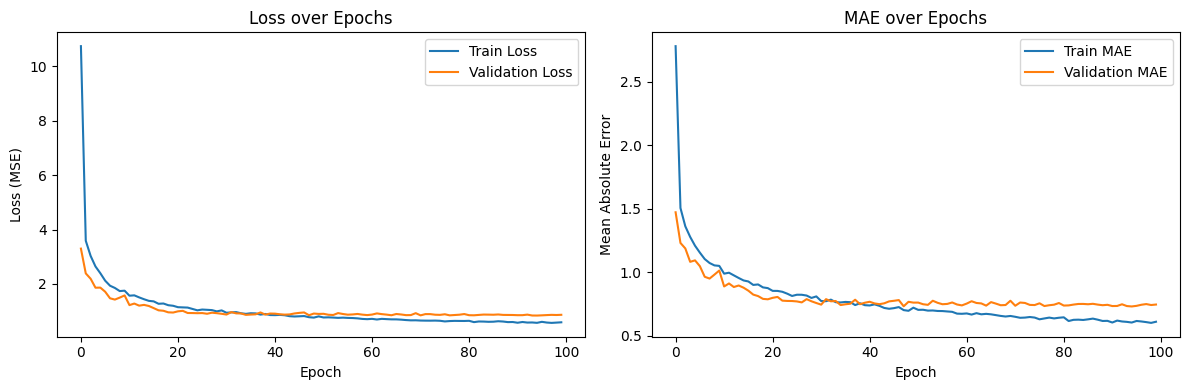

Test MSE: 0.8658
Test MAE: 0.7444
11/11 [==============================] - 0s 982us/step


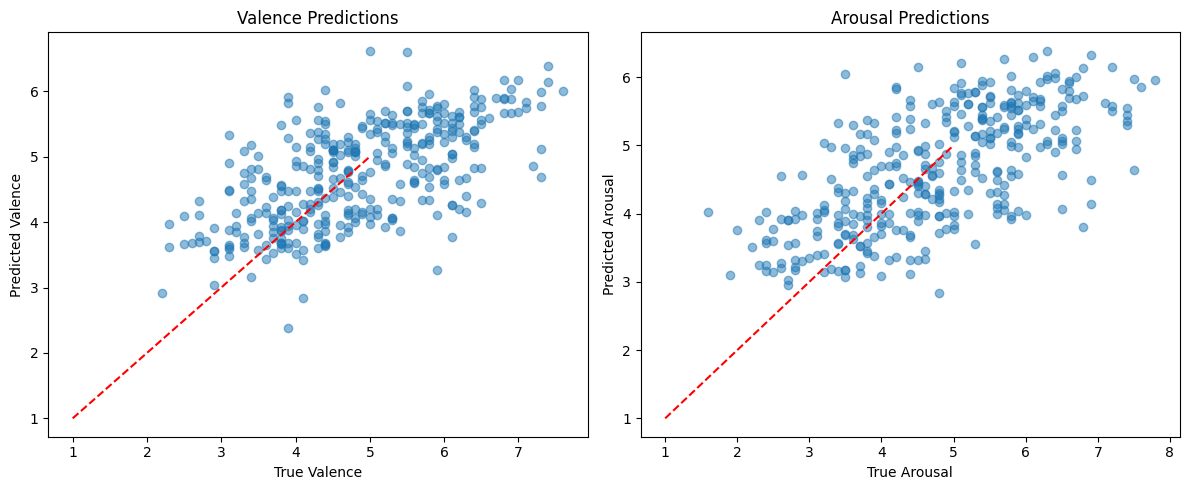

In [8]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    
    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('MAE over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history)

# Evaluate on test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test_scaled)

# Plot predictions vs true values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test['valence_mean'], y_pred[:, 0], alpha=0.5)
plt.plot([1, 5], [1, 5], 'r--')  # Perfect prediction line
plt.title('Valence Predictions')
plt.xlabel('True Valence')
plt.ylabel('Predicted Valence')

plt.subplot(1, 2, 2)
plt.scatter(y_test['arousal_mean'], y_pred[:, 1], alpha=0.5)
plt.plot([1, 5], [1, 5], 'r--')  # Perfect prediction line
plt.title('Arousal Predictions')
plt.xlabel('True Arousal')
plt.ylabel('Predicted Arousal')

plt.tight_layout()
plt.show()

In [9]:
# Save the model
model.save('emotion_predictor.h5')

# To load later:
# from tensorflow.keras.models import load_model
# loaded_model = load_model('emotion_predictor.h5')

In [14]:
# Test the model with a new audio file
# Load your trained model
model = load_model(r'C:\Users\yingx\OneDrive\Documents\GitHub\Capstone\emotion_predictor.h5')

# Function to extract features from a single WAV file
def extract_features_for_prediction(wav_file):
    y, sr = librosa.load(wav_file, sr=None)
    
    features = {
        'tempo': librosa.beat.beat_track(y=y, sr=sr)[0],
        'spectral_centroid': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'zero_crossing_rate': np.mean(librosa.feature.zero_crossing_rate(y=y)),
        'rms': np.mean(librosa.feature.rms(y=y)),
        'harmonicity': np.mean(librosa.effects.harmonic(y)),
        'chroma_feature': np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1),
        'mfccs': np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1)
    }
    
    # Convert lists to DataFrame format
    chroma_df = pd.DataFrame([features['chroma_feature']], 
                            columns=[f'chroma_{i}' for i in range(12)])
    mfcc_df = pd.DataFrame([features['mfccs']], 
                          columns=[f'mfcc_{i}' for i in range(20)])
    
    # Create final feature vector
    X = pd.concat([
        pd.DataFrame([[features['tempo'], features['spectral_centroid'], 
                     features['zero_crossing_rate'], features['rms'], 
                     features['harmonicity']]], 
                  columns=['tempo', 'spectral_centroid', 'zero_crossing_rate', 'rms', 'harmonicity']),
        chroma_df,
        mfcc_df
    ], axis=1)
    
    return X

# Path to your new WAV file
wav_path = r'C:\Users\yingx\data\WaveFiles\2.wav'

# Extract features
X_new = extract_features_for_prediction(wav_path)

# Load the scaler used during training (you need to save this during training)
# If you didn't save it, you'll need to refit it (not ideal)
scaler = StandardScaler()
# This assumes you have the original training data to fit the scaler
# Better to save the scaler during training using:
# from joblib import dump; dump(scaler, 'scaler.joblib')
# Then load here with: scaler = load('scaler.joblib')
scaler.fit(X_train)  # X_train from your training data
X_new_scaled = scaler.transform(X_new)

def interpret_emotion(valence, arousal):
    if valence > 5 and arousal > 5:
        return "happy"
    elif valence < 5 and arousal < 5:
        return "sad"
    elif arousal > 5 and valence < 5:
        return "angry"
    elif valence > 5 and arousal < 5:
        return "calm"
    else:
        return "neutral"

# Make prediction
prediction = model.predict(X_new_scaled)
valence_pred, arousal_pred = prediction[0]

# Interpret emotion
emotion = interpret_emotion(valence_pred, arousal_pred)

# Print results
print(f"Predicted Valence: {valence_pred:.2f}")
print(f"Predicted Arousal: {arousal_pred:.2f}")
print(f"\nThis song is: {emotion.upper()}")

1/1 [==============================] - 0s 33ms/step
Predicted Valence: 4.31
Predicted Arousal: 3.83

This song is: SAD
